# Data EDA

In [17]:
import pandas as pd

# Graphical imports
import matplotlib.pyplot as plt
import matplotlib.ticker as pf
import seaborn as sns

## Import cleaned data

In [29]:
# Source 1 for parse_dates
df = pd.read_csv('../data/cleaned_video_game_sales.csv', parse_dates=['release_year'])

## Perform EDA on all columns

In [30]:
df.head()

,name,platform,release_year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          16717 non-null  object        
 1   platform      16719 non-null  object        
 2   release_year  16450 non-null  datetime64[ns]
 3   genre         16717 non-null  object        
 4   publisher     16665 non-null  object        
 5   na_sales      16719 non-null  float64       
 6   eu_sales      16719 non-null  float64       
 7   jp_sales      16719 non-null  float64       
 8   other_sales   16719 non-null  float64       
 9   global_sales  16719 non-null  float64       
 10  critic_score  8137 non-null   float64       
 11  critic_count  8137 non-null   float64       
 12  user_score    7590 non-null   float64       
 13  user_count    7590 non-null   float64       
 14  developer     10096 non-null  object        
 15  rating        9950 non-null   object

Huh. Pandas turned the ints into floats... that sucks.

### Genre

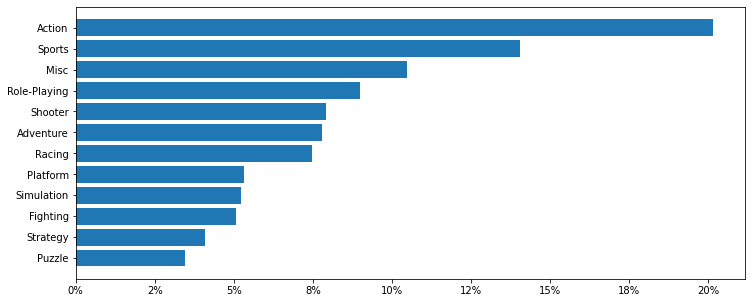

In [19]:
# Plot out the distribution of genres
plt.figure(figsize = (12, 5))

# temp variable to hold the data I want to graph
t = df.genre.value_counts(normalize=True)

plt.barh(t.index[::-1], t.values[::-1])

plt.gca().xaxis.set_major_formatter(pf.PercentFormatter(1, 0));

> Observations:

For someone as detail-oriented as myself, I find the current 'genre' field to be unhelpfully vague. For example, many games fall under both 'action' and 'adventure' genres, such as the Uncharted series. I suppose that feeling is because I'm spoiled by the 'subcategory' field from the kickstarter dataset I looked at for initiation. Where each category had its own list of subcategories. C'est la vie. I can understand why these sites would oversimplify category, since they're audience is presumably non-technical. Doesn't mean I agree with it, but that's a discussion for another day.

It would be nice to know what genres go under the miscellaneous umbrella.

In [37]:
df.release_year.value_counts().sort_index()

1980-01-01       9
1981-01-01      46
1982-01-01      36
1983-01-01      17
1984-01-01      14
1985-01-01      14
1986-01-01      21
1987-01-01      16
1988-01-01      15
1989-01-01      17
1990-01-01      16
1991-01-01      41
1992-01-01      43
1993-01-01      62
1994-01-01     121
1995-01-01     219
1996-01-01     263
1997-01-01     289
1998-01-01     379
1999-01-01     338
2000-01-01     350
2001-01-01     482
2002-01-01     829
2003-01-01     775
2004-01-01     762
2005-01-01     939
2006-01-01    1006
2007-01-01    1197
2008-01-01    1427
2009-01-01    1426
2010-01-01    1255
2011-01-01    1136
2012-01-01     653
2013-01-01     544
2014-01-01     581
2015-01-01     606
2016-01-01     502
2017-01-01       3
2020-01-01       1
Name: release_year, dtype: int64

## Check for outliers

In [38]:
df.head(1)

,name,platform,release_year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E


(array([511.,  27.,  11.,   5.,   2.,   1.,   3.,   5.,   3.,   0.,   0.,
          0.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.0000e+00, 2.8100e+01, 5.5200e+01, 8.2300e+01, 1.0940e+02,
        1.3650e+02, 1.6360e+02, 1.9070e+02, 2.1780e+02, 2.4490e+02,
        2.7200e+02, 2.9910e+02, 3.2620e+02, 3.5330e+02, 3.8040e+02,
        4.0750e+02, 4.3460e+02, 4.6170e+02, 4.8880e+02, 5.1590e+02,
        5.4300e+02, 5.7010e+02, 5.9720e+02, 6.2430e+02, 6.5140e+02,
        6.7850e+02, 7.0560e+02, 7.3270e+02, 7.5980e+02, 7.8690e+02,
        8.1400e+02, 8.4110e+02, 8.6820e+02, 8.9530e+02, 9.2240e+02,
        9.4950e+02, 9.7660e+02, 1.0037e+03, 1.0308e+03, 1.0579e+03,
        1.0850e+03, 1.1121e+03, 1.1392e+03, 1.1663e+03, 1.1934e+03,
        1.2205e+03, 1.2476e+03, 1.2747e+03, 1.

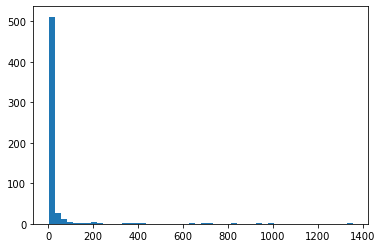

In [43]:
plt.hist(df.publisher.value_counts(), bins=50)

In [48]:
df.publisher.value_counts().filter()

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Mirai Shounen                      1
Merscom LLC                        1
BushiRoad                          1
Havas Interactive                  1
Origin Systems                     1
Name: publisher, Length: 581, dtype: int64

## Sources
1. https://stackoverflow.com/questions/33365055/attributeerror-can-only-use-dt-accessor-with-datetimelike-values